In [45]:
#import libraries
import pandas

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import sqlmlutils

import pyodbc

import pickle

In [46]:
#import data

conn_str = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; SERVER=10.10.0.104,31433; DATABASE=externalDB;UID=admin;PWD=Password1234')

query_str = 'SELECT * FROM [externalDB].[dbo].[data]'

raw_dataframe = pandas.read_sql(sql=query_str, con=conn_str)

print("Dataframe: ")
print(raw_dataframe)


Dataframe: 
        time  year month_no  total_traffic  total_passengers  total_mail
0    1980-01  1980       01           6501            566879         619
1    1980-02  1980       02           6112            552263         593
2    1980-03  1980       03           6391            597644         642
3    1980-04  1980       04           6247            561218         642
4    1980-05  1980       05           6301            587003         646
..       ...   ...      ...            ...               ...         ...
482  2020-03  2020       03          16223           1649662        2558
483  2020-04  2020       04           3865             25189         931
484  2020-05  2020       05           4472             24504        1633
485  2020-06  2020       06           4779             48241        2496
486  2020-07  2020       07           5247             85981        3054

[487 rows x 6 columns]


     total_passengers
0              566879
1              552263
2              597644
3              561218
4              587003
..                ...
482           1649662
483             25189
484             24504
485             48241
486             85981

[487 rows x 1 columns]


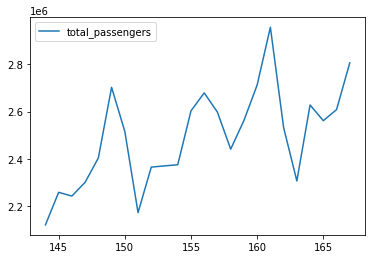

<AxesSubplot:>

In [60]:
#Observing the relationship between dependent variable and time

#custom range
custom_range_start = 144    
custom_range_stop = 168

dependent_variable = ['total_passengers'] 
dependent_dataset = raw_dataframe[dependent_variable]

print(dependent_dataset)

dependent_dataset.head(-1)[custom_range_start:custom_range_stop].plot() #modify this value to adjust number of rows returned

In [48]:
# Extract the required data

# Refine extraction range use 0 and -1 to extract entire range
index_start = 0
index_stop = -1

independent_variables = ['month_no','total_traffic'] #input any number of variables
dependent_variable = ['total_passengers'] #only input one variable

independent_dataset = raw_dataframe[independent_variables][index_start:index_stop]
dependent_dataset = raw_dataframe[dependent_variable][index_start:index_stop]

# Further splitting dataset into training and testing subsets
test_ratio=0.2 #splits the data into testing and training sets with ratio 0.2
indp_train_set, indp_test_set, dep_train_set, dep_test_set = train_test_split(independent_dataset, 
                                                                              dependent_dataset, 
                                                                              test_size=test_ratio)

print(indp_train_set) #outputs the generated test set

    month_no  total_traffic
354       01          14684
68        09           6139
285       04          10001
183       10          18398
398       09          14818
..       ...            ...
380       03          14517
395       06          15092
344       03          14593
360       07          13782
469       02          29894

[388 rows x 2 columns]


In [55]:
# Create regression object and train model
linear_model = LinearRegression()
linear_model.fit(indp_train_set, dep_train_set)

print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

linear_predictions = linear_model.predict(independent_dataset)
predictions_dataframe = pandas.DataFrame(linear_predictions)

trained_model = pickle.dumps(linear_model)

Coefficients: [[13921.89521511   173.27697313]]
Intercept: [-350853.52376184]


In [62]:
# Compare predictions
print("Model score (Higher is better): ", linear_model.score(indp_test_set, dep_test_set))

Model score (Higher is better):  0.9842385790381831
